<a id='top'></a>
## Applied Economic Analysis 1: Python Assignment

|Name|examnr.|
|----|-------|
|Desiré Vogels|262141|
|Jamy van Breda|407141|


# Millennials: a diverging lifestyle?

## Abstract
In this notebook we will look into the spending patterns of millennials when compared to people of the same age from generation X. We look into the 'millennial effect' on expenditures in various categories, using a difference-in-difference approach. We use Data from the Consumer Expenditure Survey of the Bureau of Labor Statistics. We find evidence for that fact that millennials do indeed have a different expenditure pattern than non-millennials. More specifically, we obtain a negative 'Millennial Effect' for the categories Alcoholic beverage, Entertainment, Miscellaneous, Owned dwellings and Reading. While we find a positive 'Millennial Effect' for Apparel and Services and Rented dwellings.

## Research question: 
*To what extent is there a 'Millennial Effect' when looking at the share of income spent on different consumer expenditures categories?*


## Motivation
Millennials will become the largest living generation in 2019 and will therefore slowly become the largest segment of consumers. 
The term millennial refers to people born in the 1980s, 1990s, or early 2000s, according to the [Cambridge Dictionary](https://dictionary.cambridge.org/dictionary/english/millennial).  Millennials (also known as generation Y) are the generation following Generation X and preceding Generation Z. The millennials vary from previous generations in various ways: they are known to be technologically skilled, self-centered, educated and highly diverse ([Taylor & Keeter](http://www.pewsocialtrends.org/2010/02/24/millennials-confident-connected-open-to-change/), 2010). These different caracteristics can also have an impact on the purchasing pattern of this new generation, which is of high interest for manufacturers, retailers and marketeers since the Millennials are now in their peak spending years. [Nowak, Thach and Olsen (2006)](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.470.2106&rep=rep1&type=pdf) find that for market segmentation, understanding generational differences is key. In addition, finding a 'Millennial Effect' in certain categories can also have important policy implications for the US government. 

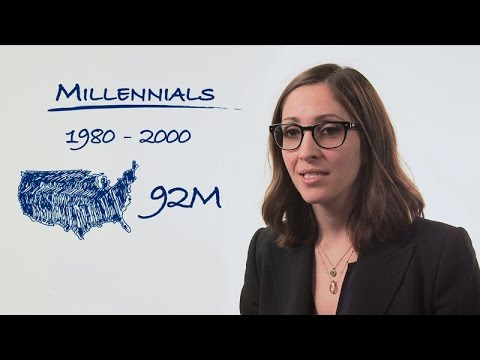

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("GwdtMs9ulLE")

As seen in the video it is often claimed that millennials are a total different generation than all former generations, as well as that they are a the most diverse generation of the American history. In table 1, we summarized the main characteristics of the millennials (age 18-34 today) and compared them to former generations. From the table can be seen that millennials are more often a minority, marry less, have a higher education level, speak more languages at home and live longer at their parents. 
Given the differences in these main characteristics, there might be a possiblility that millennials have different beliefs and preferences than other generations. But do these differences carry over to the expenditures of millennials?

In [2]:
import pandas as pd
from pandas import concat
df_characteristics = pd.read_csv('characteristics us.csv',index_col=0)
# Displaying the main characteristics, all in percentages (except total population)
df_characteristics = df_characteristics.iloc[::2]
# Reindexing
df_characteristics.index =['Total population','age 18 to 34','White, Non-Hispanic','Minority','Never married','Live alone','Bachelor degree or more','Foreign born','Speak a language other than English at home','Income below poverty line','Employed','Percent of commuters who drove a car, truck, van or carpooled to work','Live with a parent']
df_characteristics

1980  \
Total population                                     226,545,805.00    
age 18 to 34                                                  29.60    
White, Non-Hispanic                                           78.40    
Minority                                                      21.60    
Never married                                                 41.50    
Live alone                                                     7.50    
Bachelor degree or more                                       15.70    
Foreign born                                                   6.30    
Speak a language other than English at home                   10.90    
Income below poverty line                                     14.10    
Employed                                                      69.30    
Percent of commuters who drove a car, truck, va...            83.80    
Live with a parent                                            22.90    

                                                                1990  \
Total population                                     248,709,873.00    
age 18 to 34                                                  28.00    
White, Non-Hispanic                                           72.70    
Minority                                                      27.30    
Never married                                                 47.90    
Live alone                                                     7.10    
Bachelor degree or more                                       17.00    
Foreign born                                                   9.90    
Speak a language other than English at home                   15.30    
Income below poverty line                                     14.30    
Employed                                                      70.60    
Percent of commuters who drove a car, truck, va...            85.60    
Live with a parent                                            24.20    

                                                                2000  \
Total population                                     281,421,906.00    
age 18 to 34                                                  23.70    
White, Non-Hispanic                                           62.80    
Minority                                                      37.20    
Never married                                                 52.50    
Live alone                                                     7.50    
Bachelor degree or more                                       19.50    
Foreign born                                                  15.80    
Speak a language other than English at home                   22.90    
Income below poverty line                                     15.30    
Employed                                                      68.70    
Percent of commuters who drove a car, truck, va...            86.70    
Live with a parent                                            23.20    

                                                           2009-2013  
Total population                                     311,536,594.00   
age 18 to 34                                                  23.36   
White, Non-Hispanic                                           57.17   
Minority                                                      42.83   
Never married                                                 65.93   
Live alone                                                     7.07   
Bachelor degree or more                                       22.33   
Foreign born                                                  15.36   
Speak a language other than English at home                   24.61   
Income below poverty line                                     19.67   
Employed                                                      65.02   
Percent of commuters who drove a car, truck, va...            84.52   
Live with a parent                                            30.35

[Source](https://www.census.gov/censusexplorer/censusexplorer-youngadults.html)

## Method
#### Data
Our data was collected from the website of the [Bureau of Labor Statistics](https://www.bls.gov/), which is a website created by a unit of the US department of Labor. The Bureau of Labor Statistics looks into the labor market activity, working conditions and price changes in the economy for the United States of America. The data we used is from the [Consumer Expenditure Survey](https://data.bls.gov/cgi-bin/dsrv?cx), which consists of a lot of information on the expenditures of households. In addittion, the survey includes various demographic variables. 

For our analysis we looked into the data from 1984 and 2017. We choose 2017 since this is the latest available data from the survey. 1984 is chosen since it is the oldest year in which all the data from the survey is available. We choose the year that gets the furthest back in time to be able to compare millennials to generation X. Since we are looking into the difference over generations, we will compare young inhabitants today with old inhabitants today and afterwards compare this to the differences in the buying behavior of young inhabitants and old inhabitants of the previous generation (1984). In our analysis young and old are defined as follows:
- young: age 18 till age 34
- old: age 35 and older

To make sure the expenditures of 1984 can be compared to the the cost of living in 2017, we use the Consumer Price Index (CPI) to translate the 1984 expenditures into 2017 dollars. The [Consumer price Index](https://www.bls.gov/cpi/data.htm) can also be found on the website of the Bureau of Labor Statistics.  
#### Model
<a id='diffindiff'></a>
For our research we will look into the 'Millennial Effect', which will be investigated via the following difference-in-difference equation:
$$DD = (\bar{y}_{young,2015}-\bar{y}_{old,2015})-(\bar{y}_{young,1984}-\bar{y}_{old,1984})$$

- $\bar{y}$ : average expenditure share in a certain category

This difference-in-difference equation gives us some insights in whether there is an actual Millennial Effect for all different categories. In other words, it suggests that the obtained effect can be assigned to the Millennial effect and so it is __not__ due to the standard difference between 'young' and 'old' people and also __not__ due to a shifting expenditure pattern in general over the years.

When we have obtained a possible Millennial Effect, we will verify our results by analysing consumer demand on the hand of the Engel Curve, using the [Working-Leser model](https://link.springer.com/referenceworkentry/10.1007%2F978-1-349-58802-2_475). In this model, the share of expenditures for a category is expressed as a function of the natural log of total expenditures of an household. The Working-Leser model assumes that budget shares are linear in the logarithm of total expenditure ([Dudek](http://yadda.icm.edu.pl/yadda/element/bwmeta1.element.dl-catalog-5f4e4b6b-3641-4ca0-93cf-0b46dc68bad6), 2011). We choose to use the Working-Leser model since it enables to aggregate across households while taking utility maximization into account ([Deaton & Muellbauer](https://econpapers.repec.org/article/aeaaecrev/v_3a70_3ay_3a1980_3ai_3a3_3ap_3a312-26.htm), 1980). 

<a id='engel'></a>
*Working-Leser Engel curve*

$$y_{ij} = \beta _{0j}+\delta _{1j}ln(E_{i})+\mu _{i}$$

- $y_{ij}$ : Weekly expenditures for person $i$ in category $j$
- $ln(E_{i})$: Log of total expenditures for person $i$
- $\mu _{i}$: a random disturbance term that is assumed to have zero mean and constant
variance

Our coefficient of interest is $\delta_{1j}$ since this will describe how the expenditures in a particular category vary with income. 





## Results
### Cleaning the data
We obtain the raw data from the Bureau of Labor Statistics. In order to get a more comprehensive overview of our data we perform some computations. 
When this is done we obtain Table 2, which contains summary statistics of the data we use for our research. The numbers displayed are in Dollar per year.

In [3]:
import pandas as pd
# Importing the data
# Expenditures per category and per age group
df_expenditures = pd.read_csv('expenditures1.csv',header=3, index_col=1)
display(df_expenditures.head())

# Income after tax per age group
df_income = pd.read_csv('income after taxes.csv', header=3, index_col=1)
display(df_income.head())

Series ID  Annual\n1984  \
Alcoholic beverage - all consumer units  CXUALCBEVGLB0401M         275.0   
Alcoholic beverage - under 25            CXUALCBEVGLB0402M         263.0   
Alcoholic beverage - between 25 and 34   CXUALCBEVGLB0403M         335.0   
Alcoholic beverage - between 35 and 44   CXUALCBEVGLB0404M         289.0   
Alcoholic beverage - between 45 and 54   CXUALCBEVGLB0405M         367.0   

                                         Annual\n1985  Annual\n1986  \
Alcoholic beverage - all consumer units         306.0         271.0   
Alcoholic beverage - under 25                   336.0         296.0   
Alcoholic beverage - between 25 and 34          370.0         361.0   
Alcoholic beverage - between 35 and 44          369.0         288.0   
Alcoholic beverage - between 45 and 54          357.0         324.0   

                                         Annual\n1987  Annual\n1988  \
Alcoholic beverage - all consumer units         289.0           269   
Alcoholic beverage - under 25                   310.0           312   
Alcoholic beverage - between 25 and 34          353.0           355   
Alcoholic beverage - between 35 and 44          359.0           281   
Alcoholic beverage - between 45 and 54          336.0           307   

                                         Annual\n1989  Annual\n1990  \
Alcoholic beverage - all consumer units           284           293   
Alcoholic beverage - under 25                     310           318   
Alcoholic beverage - between 25 and 34            373           365   
Alcoholic beverage - between 35 and 44            324           370   
Alcoholic beverage - between 45 and 54            296           324   

                                         Annual\n1991  Annual\n1992  \
Alcoholic beverage - all consumer units           297           301   
Alcoholic beverage - under 25                     252           356   
Alcoholic beverage - between 25 and 34            370           365   
Alcoholic beverage - between 35 and 44            354           352   
Alcoholic beverage - between 45 and 54            360           299   

                                             ...       Annual\n2008  \
Alcoholic beverage - all consumer units      ...                444   
Alcoholic beverage - under 25                ...                448   
Alcoholic beverage - between 25 and 34       ...                491   
Alcoholic beverage - between 35 and 44       ...                462   
Alcoholic beverage - between 45 and 54       ...                505   

                                         Annual\n2009  Annual\n2010  \
Alcoholic beverage - all consumer units           435           412   
Alcoholic beverage - under 25                     344           406   
Alcoholic beverage - between 25 and 34            481           473   
Alcoholic beverage - between 35 and 44            498           497   
Alcoholic beverage - between 45 and 54            502           414   

                                         Annual\n2011  Annual\n2012  \
Alcoholic beverage - all consumer units           456           451   
Alcoholic beverage - under 25                     418           354   
Alcoholic beverage - between 25 and 34            513           564   
Alcoholic beverage - between 35 and 44            497           501   
Alcoholic beverage - between 45 and 54            494           454   

                                         Annual\n2013  Annual\n2014  \
Alcoholic beverage - all consumer units           445           463   
Alcoholic beverage - under 25                     379           303   
Alcoholic beverage - between 25 and 34            489           529   
Alcoholic beverage - between 35 and 44            443           505   
Alcoholic beverage - between 45 and 54            545           559   

                                         Annual\n2015  Annual\n2016  \
Alcoholic beverage - all consumer units           515           484   
Alcoholic beverage - under 25     

Series ID  Annual\n1984  \
Income after taxes - all consumer units  CXUINCAFTTXLB0401M       21237.0   
Income after taxes - under 25            CXUINCAFTTXLB0402M       11497.0   
Income after taxes - between 25 and 34   CXUINCAFTTXLB0403M       21684.0   
Income after taxes - between 35 and 44   CXUINCAFTTXLB0404M       27489.0   
Income after taxes - between 45 and 54   CXUINCAFTTXLB0405M       27589.0   

                                         Annual\n1985  Annual\n1986  \
Income after taxes - all consumer units       22887.0       23172.0   
Income after taxes - under 25                 10888.0       11525.0   
Income after taxes - between 25 and 34        23025.0       23476.0   
Income after taxes - between 35 and 44        29642.0       31133.0   
Income after taxes - between 45 and 54        30354.0       30055.0   

                                         Annual\n1987  Annual\n1988  \
Income after taxes - all consumer units       24871.0         26149   
Income after taxes - under 25                 11693.0         13819   
Income after taxes - between 25 and 34        25322.0         25928   
Income after taxes - between 35 and 44        32666.0         33227   
Income after taxes - between 45 and 54        33064.0         35999   

                                         Annual\n1989  Annual\n1990  \
Income after taxes - all consumer units         28496         28937   
Income after taxes - under 25                   13868         13246   
Income after taxes - between 25 and 34          27951         29371   
Income after taxes - between 35 and 44          36931         36737   
Income after taxes - between 45 and 54          37849         39381   

                                         Annual\n1991  Annual\n1992  \
Income after taxes - all consumer units         30729         30786   
Income after taxes - under 25                   13521         14411   
Income after taxes - between 25 and 34          30863         30114   
Income after taxes - between 35 and 44          37583         39518   
Income after taxes - between 45 and 54          43828         41659   

                                             ...       Annual\n2008  \
Income after taxes - all consumer units      ...              61774   
Income after taxes - under 25                ...              27907   
Income after taxes - between 25 and 34       ...              58809   
Income after taxes - between 35 and 44       ...              75677   
Income after taxes - between 45 and 54       ...              78537   

                                         Annual\n2009  Annual\n2010  \
Income after taxes - all consumer units         60753         60712   
Income after taxes - under 25                   25522         26777   
Income after taxes - between 25 and 34          57239         58558   
Income after taxes - between 35 and 44          74900         74136   
Income after taxes - between 45 and 54          77460         76266   

                                         Annual\n2011  Annual\n2012  \
Income after taxes - all consumer units         61673         63370   
Income after taxes - under 25                   27495         33670   
Income after taxes - between 25 and 34          56851         57437   
Income after taxes - between 35 and 44          75537         76376   
Income after taxes - between 45 and 54          75234         78859   

                                         Annual\n2013  Annual\n2014  \
Income after taxes - all consumer units         56352         58364   
Income after taxes - under 25                   26559         28518   
Income after taxes - between 25 and 34          53178         54622   
Income after taxes - between 35 and 44          69152         72495   
Income after taxes - between 45 and 54          68048         74344   

                                         Annual\n2015  Annual\n2016  \
Income after taxes - all consumer units         60448         64175   
Income after taxes - under 25

In [4]:
# Combining the two datasets into one dataframe
df_total = df_income.append(df_expenditures)
df_total.head(15)

Series ID  Annual\n1984  \
Income after taxes - all consumer units  CXUINCAFTTXLB0401M       21237.0   
Income after taxes - under 25            CXUINCAFTTXLB0402M       11497.0   
Income after taxes - between 25 and 34   CXUINCAFTTXLB0403M       21684.0   
Income after taxes - between 35 and 44   CXUINCAFTTXLB0404M       27489.0   
Income after taxes - between 45 and 54   CXUINCAFTTXLB0405M       27589.0   
Income after taxes - between 55 and 64   CXUINCAFTTXLB0406M       23660.0   
Income after taxes - over 65             CXUINCAFTTXLB0407M           NaN   
Income after taxes - between 65 and 74   CXUINCAFTTXLB0408M       14759.0   
Income after taxes - over 75             CXUINCAFTTXLB0409M       10954.0   
Alcoholic beverage - all consumer units   CXUALCBEVGLB0401M         275.0   
Alcoholic beverage - under 25             CXUALCBEVGLB0402M         263.0   
Alcoholic beverage - between 25 and 34    CXUALCBEVGLB0403M         335.0   
Alcoholic beverage - between 35 and 44    CXUALCBEVGLB0404M         289.0   
Alcoholic beverage - between 45 and 54    CXUALCBEVGLB0405M         367.0   
Alcoholic beverage - between 55 and 64    CXUALCBEVGLB0406M         297.0   

                                         Annual\n1985  Annual\n1986  \
Income after taxes - all consumer units       22887.0       23172.0   
Income after taxes - under 25                 10888.0       11525.0   
Income after taxes - between 25 and 34        23025.0       23476.0   
Income after taxes - between 35 and 44        29642.0       31133.0   
Income after taxes - between 45 and 54        30354.0       30055.0   
Income after taxes - between 55 and 64        24648.0       25543.0   
Income after taxes - over 65                      NaN           NaN   
Income after taxes - between 65 and 74        17170.0       16688.0   
Income after taxes - over 75                  11553.0       11730.0   
Alcoholic beverage - all consumer units         306.0         271.0   
Alcoholic beverage - under 25                   336.0         296.0   
Alcoholic beverage - between 25 and 34          370.0         361.0   
Alcoholic beverage - between 35 and 44          369.0         288.0   
Alcoholic beverage - between 45 and 54          357.0         324.0   
Alcoholic beverage - between 55 and 64          279.0         248.0   

                                         Annual\n1987  Annual\n1988  \
Income after taxes - all consumer units       24871.0         26149   
Income after taxes - under 25                 11693.0         13819   
Income after taxes - between 25 and 34        25322.0         25928   
Income after taxes - between 35 and 44        32666.0         33227   
Income after taxes - between 45 and 54        33064.0         35999   
Income after taxes - between 55 and 64        28137.0         27327   
Income after taxes - over 65                      NaN         16816   
Income after taxes - between 65 and 74        17637.0         19683   
Income after taxes - over 75                  12280.0         12886   
Alcoholic beverage - all consumer units         289.0           269   
Alcoholic beverage - under 25                   310.0           312   
Alcoholic beverage - between 25 and 34          353.0           355   
Alcoholic beverage - between 35 and 44          359.0           281   
Alcoholic beverage - between 45 and 54          336.0           307   
Alcoholic beverage - between 55 and 64          257.0           239   

                                         Annual\n1989  Annual\n1990  \
Income after taxes - all consumer units         28496         28937   
Income after taxes - under 25                   13868         13246   
Income after taxes - between 25 and 34          27951         29371   
Income after taxes - between 35 and 44          36931         36737   
Income after taxes - between 45 and 54          37849         39381   
Income after taxes - between 55 and 64          31119         31802   
Income after taxes - over 65                  

In [5]:
# Drop years 1985 - 2016 since we are only interested in 1984 and 2017 for our research
drops = df_total.columns[df_total.columns.get_loc('Annual\n1985'):df_total.columns.get_loc('Annual\n2016')+1]
df_total=df_total.drop(drops, axis=1)

To be able to get comparable summary statistics for the data we used in our analysis, we need to correct the prices of 1984  with the Consumer Price Index. By using the Consumer Price Index, we are able to compare the amount spend on the different categories in the two different years since we adjust for inflation. The Consumer Price Index for 2017 is 245.120 when compared to 1984. 

In [6]:
# Correct for CPI, CPI 2017	245.120
df_total['Annual\n1984']=df_total['Annual\n1984']*2.45120

# Dropping the 'over 65' age categories to prevent multicollinearity, since we already have an between 64 and 75 category
df_total.drop(df_total.index[6::9], 0)
df_total2=df_total.drop(df_total.index[6::9], 0)

# Creating a dataframe for 1984 and 2017 separated 
df_1984 = df_total2.drop(['Series ID', 'Annual\n2017'], axis=1)
df_2017 = df_total2.drop(['Series ID', 'Annual\n1984'], axis=1)

# Creating a subset of data for every age category in 1984, so that we can devide the ages into 'young' and 'old' afterwards
df_all = df_1984.iloc[::8]
df_under25 = df_1984.iloc[1::8]
df_25until34=df_1984.iloc[2::8]
df_35until44=df_1984.iloc[3::8]
df_45until54=df_1984.iloc[4::8]
df_55until65=df_1984.iloc[5::8]
df_65until74=df_1984.iloc[6::8]
df_over75=df_1984.iloc[7::8]

# Getting the same indices to be able to combine them into one dataframe
df_all.index =df_under25.index=df_25until34.index=df_35until44.index=df_45until54.index=df_55until65.index=df_65until74.index=df_over75.index
df_table2 = pd.concat([df_all, df_under25, df_25until34,df_35until44,df_45until54, df_55until65,df_65until74,df_over75], axis=1, sort=False, ignore_index=True)

# Creating new index and column names
df_table2 = df_table2.reset_index(drop=True)
new_columns=['all consumer units', 'under 25', '25 until 34', '35 until 44', '45 until 54', '55 until 64', '65 until 74','over 75']
new_index = ['Income after taxes', 'Alcoholic beverage','Apparell and services', 'Cash contributions', 'Education', 'Entertainment', 'Food away from home', 'Food at home', 'Food total', 'Healthcare', 'Housing', 'Miscellaneous', 'Owned dwellings', 'Personal care and services', 'Personal insurance and pensions', 'Reading', 'Rented dwellings', 'Tobaco products and smoking supplies', 'Transportation','Total expenditures']

# Assign new index
df_table2.index = new_index

# Assign new columns
df_table2.columns= new_columns

# Table 2 created, first version
df_table2

all consumer units    under 25  \
Income after taxes                            52056.1344  28181.4464   
Alcoholic beverage                              674.0800    644.6656   
Apparell and services                          3233.1328   2296.7744   
Cash contributions                             1730.5472    252.4736   
Education                                       742.7136   1397.1840   
Entertainment                                  2586.0160   1600.6336   
Food away from home                            3235.5840   2532.0896   
Food at home                                   4828.8640   2583.5648   
Food total                                     8064.4480   5113.2032   
Healthcare                                     2571.3088    909.3952   
Housing                                       16359.3088   9196.9024   
Miscellaneous                                  1105.4912    588.2880   
Owned dwellings                                5054.3744   1134.9056   
Personal care and services                      708.3968    392.1920   
Personal insurance and pensions                4649.9264   1929.0944   
Reading                                         323.5584    151.9744   
Rented dwellings                               2622.7840   3983.2000   
Tobaco products and smoking supplies            558.8736    389.7408   
Transportation                                10549.9648   8133.0816   
Total expenditures                            53865.1200  32995.6032   

                                      25 until 34  35 until 44  45 until 54  \
Income after taxes                     53151.8208   67381.0368   67626.1568   
Alcoholic beverage                       821.1520     708.3968     899.5904   
Apparell and services                   3358.1440    4630.3168    3973.3952   
Cash contributions                       867.7248    2421.7856    2647.2960   
Education                                531.9104     968.2240    1215.7952   
Entertainment                           2953.6960    3662.0928    3081.1584   
Food away from home                     3191.4624    4375.3920    4311.6608   
Food at home                            4485.6960    6167.2192    6326.5472   
Food total                              7677.1584   10545.0624   10640.6592   
Healthcare                              1828.5952    2392.3712    3051.7440   
Housing                                17567.7504   21497.0240   19658.6240   
Miscellaneous                           1299.1360    1514.8416    1421.6960   
Owned dwellings                         5512.7488    7775.2064    6601.0816   
Personal care and services               669.1776     850.5664     951.0656   
Personal insurance and pensions         4956.3264    6351.0592    7049.6512   
Reading                                  326.0096     399.5456     394.6432   
Rented dwellings                        3958.6880    2885.0624    1826.1440   
Tobaco products and smoking supplies     544.1664     671.6288     799.0912   
Transportation                         11243.6544   12547.6928   14555.2256   
Total expenditures                     54647.0528   69158.1568   70339.6352   

                                      55 until 64  65 until 74     over 75  
Income after taxes                     57995.3920   36177.2608  26850.4448  
Alcoholic beverage                       728.0064     384.8384    164.2304  
Apparell and services                   3277.2544    2161.9584   1056.4672  
Cash contributions                      2142.3488    1669.2672   1960.9600  
Education                                607.8976     186.2912    223.0592  
Entertainment                           2612.9792    1458.4640    911.8464  
Food away from home                     3304.2176    2171.7632   1164.3200  
Food at home                            5189.1904    4144.9792   3103.2192  
Food total                              8493.4080    6319.1936   4267.5392  
Healthcare                              3076.2560    3640.0320   3686.6048  
Housing           

In [7]:
# Create a category for 'young'. I.e. ≤ 34, and a category for 'old' >34
# First we need to know how many people are in each category, so we load in the data consumer units.
df_consumerunits = pd.read_excel('consumer units.xlsx',index_col=0)
df_consumerunits.round(2)

Description  Annual\n1984  1984 in %  Annual\n2017  \
CXUCONSUNITLB0401M             All CU       90223.0       1.00        130001   
CXUCONSUNITLB0402M       Under age 25        8811.0       0.10          7590   
CXUCONSUNITLB0403M  Between 25 and 34       20058.0       0.22         21282   
CXUCONSUNITLB0404M  Between 35 and 44       17118.0       0.19         21101   
CXUCONSUNITLB0405M  Between 45 and 54       13027.0       0.14         23580   
CXUCONSUNITLB0406M  Between 55 and 65       13343.0       0.15         24713   
CXUCONSUNITLB0407M        Over age 65           NaN       0.00         31734   
CXUCONSUNITLB0408M  Between 65 and 74       10761.0       0.12         18535   
CXUCONSUNITLB0409M            Over 75        7105.0       0.08         13199   

                    2017 in %  
CXUCONSUNITLB0401M       1.00  
CXUCONSUNITLB0402M       0.06  
CXUCONSUNITLB0403M       0.16  
CXUCONSUNITLB0404M       0.16  
CXUCONSUNITLB0405M       0.18  
CXUCONSUNITLB0406M       0.19  
CXUCONSUNITLB0407M       0.24  
CXUCONSUNITLB0408M       0.14  
CXUCONSUNITLB0409M       0.10

In [8]:
# Creating a new dataframe with the relative percentage of age groups
agecategory = [(1,1),
              (0.10/0.32,0.06/0.22),
              (0.22/0.32,0.16/0.22),
              (0.19/0.68,0.16/0.77),
              (0.14/0.68,0.18/0.77),
              (0.15/0.68,0.19/0.77),
              (0.12/0.68,0.14/0.77),
              (0.08/0.68,0.10/0.77)]
labels = ['1984','2017']
index=['all consumer units', 'under 25','25 until 34', '35 until 44', '45 until 54', '55 until 64','65 until 74','over 75']
agerelative = pd.DataFrame.from_records(agecategory, columns=labels, index=index).round(2)

# Multiplying the expenditures of table 2 by the relative share of the age groups to get the expenditures of the 'young' and 'old' group in the end
df_table2relative = df_table2.multiply(agerelative['1984'])

# Creating the subgroups 'young' and 'old'
df_table2relative['young 1984'] = df_table2relative['under 25'] + df_table2relative['25 until 34']
df_table2relative['old 1984'] =  df_table2relative['35 until 44'] + df_table2relative['45 until 54'] + df_table2relative['55 until 64'] + df_table2relative['65 until 74'] + df_table2relative['over 75']

# Dropping the other age categories and renaming columns
drops2 = df_table2relative.columns[df_table2relative.columns.get_loc('under 25'):df_table2relative.columns.get_loc('over 75')+1]
table2_1984 = df_table2relative.drop(drops2, axis=1)
table2_1984 = table2_1984.rename(columns={"all consumer units": "all consumer units 1984"})

# Generate table 2 for 1984
table2_1984

all consumer units 1984    young 1984  \
Income after taxes                                 52056.1344  45411.004736   
Alcoholic beverage                                   674.0800    766.441216   
Apparell and services                               3233.1328   3029.119424   
Cash contributions                                  1730.5472    676.996928   
Education                                            742.7136    800.145216   
Entertainment                                       2586.0160   2534.246656   
Food away from home                                 3235.5840   2987.056832   
Food at home                                        4828.8640   3896.035328   
Food total                                          8064.4480   6882.332288   
Healthcare                                          2571.3088   1543.643200   
Housing                                            16359.3088  14972.787520   
Miscellaneous                                       1105.4912   1078.773120   
Owned dwellings                                     5054.3744   4155.617408   
Personal care and services                           708.3968    583.312064   
Personal insurance and pensions                     4649.9264   4017.884480   
Reading                                              323.5584    272.058688   
Rented dwellings                                    2622.7840   3966.286720   
Tobaco products and smoking supplies                 558.8736    496.294464   
Transportation                                     10549.9648  10279.376832   
Total expenditures                                 53865.1200  47935.103424   

                                          old 1984  
Income after taxes                    55561.129792  
Alcoholic beverage                      636.405056  
Apparell and services                  3367.826240  
Cash contributions                     2241.132160  
Education                               720.456704  
Entertainment                          2619.229760  
Food away from home                    3388.122176  
Food at home                           5315.500736  
Food total                             8705.265216  
Healthcare                             3085.104832  
Housing                               17115.307904  
Miscellaneous                          1124.267392  
Owned dwellings                        5497.036608  
Personal care and services              772.961408  
Personal insurance and pensions        4956.767616  
Reading                                 349.761728  
Rented dwellings                       2007.312192  
Tobaco products and smoking supplies    591.621632  
Transportation                        10730.275072  
Total expenditures                    57016.137600

In [9]:
# Do exactly the same for 2017
df_2017

# Create a column for every nth row to cluster by age
# Creating a column for every 9 rows
df2017_all = df_2017.iloc[::8]
df2017_under25 = df_2017.iloc[1::8]
df2017_25until34=df_2017.iloc[2::8]
df2017_35until44=df_2017.iloc[3::8]
df2017_45until54=df_2017.iloc[4::8]
df2017_55until65=df_2017.iloc[5::8]
df2017_65until74=df_2017.iloc[6::8]
df2017_over75=df_2017.iloc[7::8]
df2017_all.index =df2017_under25.index=df2017_25until34.index=df2017_35until44.index=df2017_45until54.index=df2017_55until65.index=df2017_65until74.index=df2017_over75.index

# Combine together into one dataframe
df2017_table2 = pd.concat([df2017_all, df2017_under25, df2017_25until34,df2017_35until44,df2017_45until54, df2017_55until65,df2017_65until74,df2017_over75], axis=1, sort=False, ignore_index=True)

# Drop column labels
df2017_table2 = df2017_table2.reset_index(drop=True)

# Create new index (same index as for 1984)
new_index = ['Income after taxes', 'Alcoholic beverage','Apparell and services', 'Cash contributions', 'Education', 'Entertainment', 'Food away from home', 'Food at home', 'Food total', 'Healthcare', 'Housing', 'Miscellaneous', 'Owned dwellings', 'Personal care and services', 'Personal insurance and pensions', 'Reading', 'Rented dwellings', 'Tobaco products and smoking supplies', 'Transportation', 'Total expenditures']

# Assign new index
df2017_table2.index = new_index

# Create column names
df2017_table2.columns= ['all consumer units', 'under 25', '25 until 34', '35 until 44', '45 until 54', '55 until 64', '65 until 74','over 75']

# Now multiply by relative amount per age group
df2017_table2relative = df2017_table2.multiply(agerelative['2017'])

# Create 'young' and 'old' age category
df2017_table2relative['young 2017'] = df2017_table2relative['under 25'] + df2017_table2relative['25 until 34']
df2017_table2relative['old 2017'] =  df2017_table2relative['35 until 44'] + df2017_table2relative['45 until 54'] + df2017_table2relative['55 until 64'] + df2017_table2relative['65 until 74'] + df2017_table2relative['over 75']

# Drop other age categories and renaming columns
drops3 = df2017_table2relative.columns[df2017_table2relative.columns.get_loc('under 25'):df2017_table2relative.columns.get_loc('over 75')+1]
table2_2017 = df2017_table2relative.drop(drops3, axis=1)
table2_2017 = table2_2017.rename(columns={"all consumer units": "all consumer units 2017"})

# Generate table 2 for 2017
table2_2017

all consumer units 2017  young 2017  \
Income after taxes                                    63606.0    52725.05   
Alcoholic beverage                                      558.0      503.88   
Apparell and services                                  1833.0     1845.71   
Cash contributions                                     1873.0      773.50   
Education                                              1491.0     1530.73   
Entertainment                                          3203.0     2331.88   
Food away from home                                    3365.0     3131.42   
Food at home                                           4363.0     3548.21   
Food total                                             7729.0     6679.63   
Healthcare                                             4928.0     2726.68   
Housing                                               19884.0    17585.56   
Miscellaneous                                          1010.0      585.03   
Owned dwellings                                        6947.0     4003.72   
Personal care and services                              762.0      597.10   
Personal insurance and pensions                        6771.0     5503.79   
Reading                                                 110.0       55.87   
Rented dwellings                                       4167.0     6917.02   
Tobaco products and smoking supplies                    332.0      295.19   
Transportation                                         9576.0     8450.80   
Total expenditures                                    60060.0    49467.08   

                                      old 2017  
Income after taxes                    66702.56  
Alcoholic beverage                      573.26  
Apparell and services                  1828.19  
Cash contributions                     2184.93  
Education                              1480.75  
Entertainment                          3450.20  
Food away from home                    3432.53  
Food at home                           4599.87  
Food total                             8032.53  
Healthcare                             5551.63  
Housing                               20530.15  
Miscellaneous                          1130.60  
Owned dwellings                        7780.76  
Personal care and services              809.74  
Personal insurance and pensions        7139.90  
Reading                                 125.46  
Rented dwellings                       3379.83  
Tobaco products and smoking supplies    343.34  
Transportation                         9897.73  
Total expenditures                    63078.12

In [10]:
# Put the two tables together to create the final version of table 2 
table2_total = table2_1984.join(table2_2017)
table2_total = table2_total.round(2)
table2_total

all consumer units 1984  young 1984  \
Income after taxes                                   52056.13    45411.00   
Alcoholic beverage                                     674.08      766.44   
Apparell and services                                 3233.13     3029.12   
Cash contributions                                    1730.55      677.00   
Education                                              742.71      800.15   
Entertainment                                         2586.02     2534.25   
Food away from home                                   3235.58     2987.06   
Food at home                                          4828.86     3896.04   
Food total                                            8064.45     6882.33   
Healthcare                                            2571.31     1543.64   
Housing                                              16359.31    14972.79   
Miscellaneous                                         1105.49     1078.77   
Owned dwellings                                       5054.37     4155.62   
Personal care and services                             708.40      583.31   
Personal insurance and pensions                       4649.93     4017.88   
Reading                                                323.56      272.06   
Rented dwellings                                      2622.78     3966.29   
Tobaco products and smoking supplies                   558.87      496.29   
Transportation                                       10549.96    10279.38   
Total expenditures                                   53865.12    47935.10   

                                      old 1984  all consumer units 2017  \
Income after taxes                    55561.13                  63606.0   
Alcoholic beverage                      636.41                    558.0   
Apparell and services                  3367.83                   1833.0   
Cash contributions                     2241.13                   1873.0   
Education                               720.46                   1491.0   
Entertainment                          2619.23                   3203.0   
Food away from home                    3388.12                   3365.0   
Food at home                           5315.50                   4363.0   
Food total                             8705.27                   7729.0   
Healthcare                             3085.10                   4928.0   
Housing                               17115.31                  19884.0   
Miscellaneous                          1124.27                   1010.0   
Owned dwellings                        5497.04                   6947.0   
Personal care and services              772.96                    762.0   
Personal insurance and pensions        4956.77                   6771.0   
Reading                                 349.76                    110.0   
Rented dwellings                       2007.31                   4167.0   
Tobaco products and smoking supplies    591.62                    332.0   
Transportation                        10730.28                   9576.0   
Total expenditures                    57016.14                  60060.0   

                                      young 2017  old 2017  
Income after taxes                      52725.05  66702.56  
Alcoholic beverage                        503.88    573.26  
Apparell and services                    1845.71   1828.19  
Cash contributions                        773.50   2184.93  
Education                                1530.73   1480.75  
Entertainment                            2331.88   3450.20  
Food away from home                      3131.42   3432.53  
Food at home                             3548.21   4599.87  
Food total                               6679.63   8032.53  
Healthcare                               2726.68   5551.63  
Housing                                 17585.56  20530.15  
Miscellaneous                             585.03   1130.60  
Owned dwellings                          4003.72   

In [11]:
# Creating a separate table for the expenditures
table2_expenditures =  table2_total[1:19]
table2_expenditures

all consumer units 1984  young 1984  \
Alcoholic beverage                                     674.08      766.44   
Apparell and services                                 3233.13     3029.12   
Cash contributions                                    1730.55      677.00   
Education                                              742.71      800.15   
Entertainment                                         2586.02     2534.25   
Food away from home                                   3235.58     2987.06   
Food at home                                          4828.86     3896.04   
Food total                                            8064.45     6882.33   
Healthcare                                            2571.31     1543.64   
Housing                                              16359.31    14972.79   
Miscellaneous                                         1105.49     1078.77   
Owned dwellings                                       5054.37     4155.62   
Personal care and services                             708.40      583.31   
Personal insurance and pensions                       4649.93     4017.88   
Reading                                                323.56      272.06   
Rented dwellings                                      2622.78     3966.29   
Tobaco products and smoking supplies                   558.87      496.29   
Transportation                                       10549.96    10279.38   

                                      old 1984  all consumer units 2017  \
Alcoholic beverage                      636.41                    558.0   
Apparell and services                  3367.83                   1833.0   
Cash contributions                     2241.13                   1873.0   
Education                               720.46                   1491.0   
Entertainment                          2619.23                   3203.0   
Food away from home                    3388.12                   3365.0   
Food at home                           5315.50                   4363.0   
Food total                             8705.27                   7729.0   
Healthcare                             3085.10                   4928.0   
Housing                               17115.31                  19884.0   
Miscellaneous                          1124.27                   1010.0   
Owned dwellings                        5497.04                   6947.0   
Personal care and services              772.96                    762.0   
Personal insurance and pensions        4956.77                   6771.0   
Reading                                 349.76                    110.0   
Rented dwellings                       2007.31                   4167.0   
Tobaco products and smoking supplies    591.62                    332.0   
Transportation                        10730.28                   9576.0   

                                      young 2017  old 2017  
Alcoholic beverage                        503.88    573.26  
Apparell and services                    1845.71   1828.19  
Cash contributions                        773.50   2184.93  
Education                                1530.73   1480.75  
Entertainment                            2331.88   3450.20  
Food away from home                      3131.42   3432.53  
Food at home                             3548.21   4599.87  
Food total                               6679.63   8032.53  
Healthcare                               2726.68   5551.63  
Housing                                 17585.56  20530.15  
Miscellaneous                             585.03   1130.60  
Owned dwellings                          4003.72   7780.76  
Personal care and services                597.10    809.74  
Personal insurance and pensions          5503.79   7139.90  
Reading                                    55.87    125.46  
Rented dwellings                         6917.02   3379.83  
Tobaco products and smoking supplies      295.19    343.34  
Transportation                           8450.80  

In [12]:
# Test for statistically significant difference in overall mean
from scipy.stats import ttest_ind
stat, p = ttest_ind(table2_expenditures.iloc[:,1], table2_expenditures.iloc[:,4])
display('Statistic=%.3f, p=%.3f' % (stat, p))

stat, p = ttest_ind(table2_expenditures.iloc[:,0], table2_expenditures.iloc[:,3])
display('Statistic=%.3f, p=%.3f' % (stat, p))

stat, p = ttest_ind(table2_expenditures.iloc[:,2], table2_expenditures.iloc[:,5])
display('Statistic=%.3f, p=%.3f' % (stat, p))

'Statistic=-0.169, p=0.867'

'Statistic=-0.346, p=0.731'

'Statistic=-0.323, p=0.748'

With the p-values given above, we can not reject the null hypothesis that there is no overall difference between the expenditures of different consumer units. However, there might still be a difference between each category separately, which is what we are interested in. We will look further into this with [our difference-in-difference approach](#diffindiff).
But before we start the difference-in-difference approach it is handy to first get a visual overview of the differences for each category.

In [13]:
# Importing packaged needed for visualisation
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

In [15]:
# Create pie charts of the expenditures 
fig= {
    'data': [
        {
        'labels':['Alcoholic beverage','Apparell and services', 'Cash contributions', 'Education', 'Entertainment', 'Food away from home', 'Food at home', 'Food total', 'Healthcare', 'Housing', 'Miscellaneous', 'Owned dwellings', 'Personal care and services', 'Personal insurance and pensions', 'Reading', 'Rented dwellings', 'Tobaco products and smoking supplies', 'Transportation'],
        'values':table2_expenditures['young 1984'],
        'type': 'pie',
        'name': 'young 1984',
        'domain': {'x':[0,0.49],
                  'y':[0,0.49]},
        'hoverinfo': 'label+percent+value',
        'textinfo':'none'
        },
        {
        'labels':['Alcoholic beverage','Apparell and services', 'Cash contributions', 'Education', 'Entertainment', 'Food away from home', 'Food at home', 'Food total', 'Healthcare', 'Housing', 'Miscellaneous', 'Owned dwellings', 'Personal care and services', 'Personal insurance and pensions', 'Reading', 'Rented dwellings', 'Tobaco products and smoking supplies', 'Transportation'],
        'values':table2_expenditures['old 1984'],
        'type': 'pie',
        'name': 'old 1984',
        'domain': {'x':[0.51,1],
                  'y':[0,0.49]},
        'hoverinfo': 'label+percent+value',
        'textinfo':'none'
        },
        {
        'labels':['Alcoholic beverage','Apparell and services', 'Cash contributions', 'Education', 'Entertainment', 'Food away from home', 'Food at home', 'Food total', 'Healthcare', 'Housing', 'Miscellaneous', 'Owned dwellings', 'Personal care and services', 'Personal insurance and pensions', 'Reading', 'Rented dwellings', 'Tobaco products and smoking supplies', 'Transportation'],
        'values':table2_expenditures['young 2017'],
        'type': 'pie',
        'name': 'young 2017',
        'domain': {'x':[0,0.49],
                  'y':[0.51,1]},
        'hoverinfo': 'label+percent+value',
        'textinfo':'none'
        },
        {
        'labels':['Alcoholic beverage','Apparell and services', 'Cash contributions', 'Education', 'Entertainment', 'Food away from home', 'Food at home', 'Food total', 'Healthcare', 'Housing', 'Miscellaneous', 'Owned dwellings', 'Personal care and services', 'Personal insurance and pensions', 'Reading', 'Rented dwellings', 'Tobaco products and smoking supplies', 'Transportation'],
        'values':table2_expenditures['old 2017'],
        'type': 'pie',
        'name': 'old 2017',
        'domain': {'x':[0.51,1],
                  'y':[0.51,1]},
        'hoverinfo': 'label+percent+value',
        'textinfo':'none'
        },
    ],
       "layout": {
        "title":"Expenditure patterns",
        "annotations": [
            {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "young 2017",
                "x": 0,
                "y": 1
            },
            {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "old 2017",
                "x": 0.55,
                "y": 1
            },
               {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "young 1984",
                "x": 0,
                "y": 0.5
            },
               {
                "font": {
                    "size": 15
                },
                "showarrow": False,
                "text": "old 1984",
                "x": 0.55,
                "y": 0.5
            }
        ]
    }
}

py.iplot(fig, filename='subplots')
    

These pie charts give us a nice overview about how much money is spent on each category for all different consumer groups. By means of this figure we can also check how much is spent on each category relatively.

For instance, many news [articles](https://www.cnbc.com/2018/07/09/these-are-the-reasons-why-millions-of-millennials-cant-buy-houses.html) go on about how millennials start reproducing at a later age, marry later, have a growing student debt etc. These are all factors that might influence whether people would want to buy a house or stay renting. So we might get the idea that millennials people spend more money on paying their rent relative to money spent on housing, compared to non-millennials. We can check whether this could be the case by simply clicking on the categories 'rented dwellings' and 'housing'. This immediately shows that it has always been the case that 'young' people spend more on rented dwellings relative to housing compared to 'old' people. This is even more evidently the case for millennials, which suggests that there might indeed be a millennial effect for these specific categories. 

Hence, any thoughts about a changed expenditure pattern of millennials can be explored here in a visual way.

In [16]:
# Calculatin the difference-in-difference 
test1984 = ((table2_expenditures['young 1984']-table2_expenditures['old 1984'])/(table2_expenditures['old 1984']))*100
test2017= ((table2_expenditures['young 2017']-table2_expenditures['old 2017'])/(table2_expenditures['old 2017']))*100
diff_in_diff=test2017-test1984
diff_in_diff=diff_in_diff.iloc[0:18]

In [17]:
# Displaying the difference-in-difference for each category
labels4 = ['diffindiff']
index4= ['Alcoholic beverage','Apparell and services', 'Cash contributions', 'Education', 'Entertainment', 'Food away from home', 'Food at home', 'Food total', 'Healthcare', 'Housing', 'Miscellaneous', 'Owned dwellings', 'Personal care and services', 'Personal insurance and pensions', 'Reading', 'Rented dwellings', 'Tobaco products and smoking supplies', 'Transportation']
did = pd.DataFrame(diff_in_diff, columns=labels4, index=index4)
did.round(2)

diffindiff
Alcoholic beverage                        -32.53
Apparell and services                      11.02
Cash contributions                          5.19
Education                                  -7.69
Entertainment                             -29.17
Food away from home                         3.06
Food at home                                3.84
Food total                                  4.10
Healthcare                                 -0.92
Housing                                    -1.82
Miscellaneous                             -44.21
Owned dwellings                           -24.14
Personal care and services                 -1.72
Personal insurance and pensions            -3.97
Reading                                   -33.25
Rented dwellings                            7.06
Tobaco products and smoking supplies        2.09
Transportation                            -10.42

The previous table shows us an indication of the millennial effect in percentages. Percentages are used so that it is easier to see the relative change and compare it across the categories. A 500$ increase in money spend on food is much more meaningful than a similar increase in money spend on housing, therefore percentages come in handy. 

In this table we can see for example that being a millennial has a positive effect on the amount spend on rented dwellings, which is in line with what we saw when looking at the pie charts.

In [18]:
# Combining the difference-in-difference and Table 2
table2_expenditures = pd.concat([table2_expenditures,did], axis=1, sort=False)
table2_expenditures.round(2)

all consumer units 1984  young 1984  \
Alcoholic beverage                                     674.08      766.44   
Apparell and services                                 3233.13     3029.12   
Cash contributions                                    1730.55      677.00   
Education                                              742.71      800.15   
Entertainment                                         2586.02     2534.25   
Food away from home                                   3235.58     2987.06   
Food at home                                          4828.86     3896.04   
Food total                                            8064.45     6882.33   
Healthcare                                            2571.31     1543.64   
Housing                                              16359.31    14972.79   
Miscellaneous                                         1105.49     1078.77   
Owned dwellings                                       5054.37     4155.62   
Personal care and services                             708.40      583.31   
Personal insurance and pensions                       4649.93     4017.88   
Reading                                                323.56      272.06   
Rented dwellings                                      2622.78     3966.29   
Tobaco products and smoking supplies                   558.87      496.29   
Transportation                                       10549.96    10279.38   

                                      old 1984  all consumer units 2017  \
Alcoholic beverage                      636.41                    558.0   
Apparell and services                  3367.83                   1833.0   
Cash contributions                     2241.13                   1873.0   
Education                               720.46                   1491.0   
Entertainment                          2619.23                   3203.0   
Food away from home                    3388.12                   3365.0   
Food at home                           5315.50                   4363.0   
Food total                             8705.27                   7729.0   
Healthcare                             3085.10                   4928.0   
Housing                               17115.31                  19884.0   
Miscellaneous                          1124.27                   1010.0   
Owned dwellings                        5497.04                   6947.0   
Personal care and services              772.96                    762.0   
Personal insurance and pensions        4956.77                   6771.0   
Reading                                 349.76                    110.0   
Rented dwellings                       2007.31                   4167.0   
Tobaco products and smoking supplies    591.62                    332.0   
Transportation                        10730.28                   9576.0   

                                      young 2017  old 2017  diffindiff  
Alcoholic beverage                        503.88    573.26      -32.53  
Apparell and services                    1845.71   1828.19       11.02  
Cash contributions                        773.50   2184.93        5.19  
Education                                1530.73   1480.75       -7.69  
Entertainment                            2331.88   3450.20      -29.17  
Food away from home                      3131.42   3432.53        3.06  
Food at home                             3548.21   4599.87        3.84  
Food total                               6679.63   8032.53        4.10  
Healthcare                               2726.68   5551.63       -0.92  
Housing                                 17585.56  20530.15       -1.82  
Miscellaneous                             585.03   1130.60      -44.21  
Owned dwellings                          4003.72   7780.76      -24.14  
Personal care and services                597.10    809.74       -1.72  
Personal insurance and pensions          5503.79   7139.90       -3.97  
Reading                                    55.87    1

In [19]:
# Create histogram of difference-in-difference outcomes
y = table2_expenditures['diffindiff']
histogram = [go.Bar(
                x=['Alcoholic beverage','Apparell and services', 'Cash contributions', 'Education', 'Entertainment', 'Food away from home', 'Food at home', 'Food total', 'Healthcare', 'Housing', 'Miscellaneous', 'Owned dwellings', 'Personal care and services', 'Personal insurance and pensions', 'Reading', 'Rented dwellings', 'Tobaco products and smoking supplies', 'Transportation'],
                y=y,
)]
py.iplot(histogram, filename='basic-bar')


When examining the 'Millennial effect' we find positive results for 'apparell and services', 'cash contributions', 'food away from home', 'food at home', 'food total', 'rented dwellings' and 'tobaco products and smoking supplies'. This means that millennials are spending a bigger share of their total expenditures on those categories, even when controlling for standard age differences and differences that arise over time. On the other hand, a negative millennial effect is found for the categories 'alcoholic beverage', 'education', 'entertainment', 'healthcare', 'housing' 'miscellaneous', 'owned dwellings', 'personal care and services', 'personal insurance and pensions', 'reading' and 'transportation'.

The difference in difference we run already implicates that millennials have a different expenditure pattern. To invigorate this result, we will look into the [Working-Leser model](#engel) on consumer demand to model the Engel curves [(Rufino, 2016)](http://dlsu-aki.weebly.com/uploads/1/0/2/2/102266760/engel_curve_modeling.pdf) of Millennials and compare them to non-millenials. We will do so for the most outstanding categories from the difference in difference equation: Alcoholic beverage, Apparell and Service, Entertainment and Reading. 

To do so, we looked into the Consumer Expenditure Survey again and this time we did not take the average expenditures of all participants but a sample of the total population to make sure that we could create a seperate datapoint per household to be able to plot the Engel Curve. The expenditures are per quarter in this dataset. An assumption we make here is that the sample we take is reprensentative for the total population.

In [20]:
# Engelcurve 2017
df_engel = pd.read_csv('engel curve2.csv',index_col=0)
df_engel.head()

AGE_REF    TOTEXPPQ  ALCBEVPQ  READPQ  APPARPQ  ENTERTPQ
3639564       67  13805.0000      43.0      60    104.0     675.0
3639634       65  10873.0000     130.0      66    370.0     590.0
3640054       33  24568.7501     190.0      40    150.0     334.0
3640214       62  18179.8501      66.0     132    111.0    3806.0
3641134       58  17457.0999      66.0      30    105.0    1296.0

In [21]:
# Creating our 'young' and 'old' categories again
df_engel=df_engel.sort_values(by=['AGE_REF'])
df_engelyoung=df_engel[df_engel['AGE_REF']<35]
df_engelold=df_engel[df_engel['AGE_REF']>34]

In [23]:
# Importing scientific libraries
from numpy import arange,array,ones
from scipy import stats
import math

# Generating the x and y variables needed
# Start with the alcoholic beverage category
xi_old = np.array(df_engelold['TOTEXPPQ'])
xi_old = np.log(xi_old)
y_old = np.array(df_engelold['ALCBEVPQ'])

xi_old = xi_old
y_old = y_old


# Generate polynomial fit
z = np.polyfit(xi_old,y_old,3)
f = np.poly1d(z)

xi_old_new=np.linspace(8,11)
y_old_new = f(xi_old_new)

trace1 = go.Scatter(
                  x=xi_old,
                  y=y_old,
                  mode='markers',
                  marker=go.Marker(color='rgb(255, 106, 106)'),
                  name='Non-Millennial'
                  )

trace2 = go.Scatter(
                  x=xi_old_new,
                  y=y_old_new,
                  mode='lines',
                  marker=go.Marker(color='rgb(255, 0, 0)'),
                  name='Fit Non-Millennial'
                  )


xi_young = np.array(df_engelyoung['TOTEXPPQ'])
xi_young = np.log(xi_young)
y_young = np.array(df_engelyoung['ALCBEVPQ'])

xi_young = xi_young
y_young = y_young


# Generate polynomial fit
z = np.polyfit(xi_young,y_young,3)
f = np.poly1d(z)

xi_young_new =np.linspace(8,11)
y_young_new = f(xi_young_new)

trace3 = go.Scatter(
                  x=xi_young,
                  y=y_young,
                  mode='markers',
                  marker=go.Marker(color='rgb(30, 144, 255)'),
                  name='Millennials'
                  )

trace4 = go.Scatter(
                  x=xi_young_new,
                  y=y_young_new,
                  mode='lines',
                  marker=go.Marker(color='rgb(0, 0, 205)'),
                  name='Fit-Millennials'
                  )
annotation = go.Annotation(
                  x=3.5,
                  y=23.5,
                  text='',
                  showarrow=False,
                  font=go.Font(size=16)
                  )
layout = go.Layout(
                title= 'Engel Curve - Alcoholic Beverage',
                plot_bgcolor='rgb(205, 205, 205)',
                  xaxis=go.XAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)', title= 'log expenditures'),
                  yaxis=go.YAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)', title= 'alcoholic beverages expenditures'),
                  annotations=[annotation],
                )

data2 = [trace1, trace2, trace3, trace4]
fig = go.Figure(data=data2, layout=layout)

py.iplot(fig, filename='Engel Curve - Alcoholic Beverage')

In [24]:
# Category reading
# xi_young, xi_old, xi_old_new en xi_young_new remain the same

y_old_read = np.array(df_engelold['READPQ'])


# Generate polynomial fit
z = np.polyfit(xi_old,y_old_read,3)
f = np.poly1d(z)

xi_old_new=np.linspace(8,11)
y_old_new_read = f(xi_old_new)

trace1 = go.Scatter(
                  x=xi_old,
                  y=y_old_read,
                  mode='markers',
                  marker=go.Marker(color='rgb(255, 106, 106)'),
                  name='Non-Millennial'
                  )

trace2 = go.Scatter(
                  x=xi_old_new,
                  y=y_old_new_read,
                  mode='lines',
                  marker=go.Marker(color='rgb(255, 0, 0)'),
                  name='Fit Non-Millennial'
                  )


y_young_read = np.array(df_engelyoung['READPQ'])

# Generate polynomial fit
z = np.polyfit(xi_young,y_young_read,3)
f = np.poly1d(z)

xi_young_new =np.linspace(8,11)
y_young_new_read = f(xi_young_new)

trace3 = go.Scatter(
                  x=xi_young,
                  y=y_young_read,
                  mode='markers',
                  marker=go.Marker(color='rgb(30, 144, 255)'),
                  name='Millennials'
                  )

trace4 = go.Scatter(
                  x=xi_young_new,
                  y=y_young_new_read,
                  mode='lines',
                  marker=go.Marker(color='rgb(0, 0, 205)'),
                  name='Fit-Millennials'
                  )

layout = go.Layout(
                title= 'Engel Curve - Reading',
                plot_bgcolor='rgb(205, 205, 205)',
                  xaxis=go.XAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)', title= 'log expenditures'),
                  yaxis=go.YAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)', title= 'Reading expenditures'),
                  annotations=[annotation],
                )
annotation = go.Annotation(
                  x=3.5,
                  y=23.5,
                  text='',
                  showarrow=False,
                  font=go.Font(size=16)
                  )

data2 = [trace1, trace2, trace3, trace4]
fig = go.Figure(data=data2, layout=layout)

py.iplot(fig, filename='Engel Curve - Reading')

In [25]:
# Category entertainment
# xi_young, xi_old, xi_old_new en xi_young_new still remain the same

y_old_entertainment = np.array(df_engelold['ENTERTPQ'])


# Generate polynomial fit
z = np.polyfit(xi_old,y_old_entertainment,3)
f = np.poly1d(z)

xi_old_new=np.linspace(8,11)
y_old_new_entertainment = f(xi_old_new)

trace1 = go.Scatter(
                  x=xi_old,
                  y=y_old_entertainment,
                  mode='markers',
                  marker=go.Marker(color='rgb(255, 106, 106)'),
                  name='Non-Millennial'
                  )

trace2 = go.Scatter(
                  x=xi_old_new,
                  y=y_old_new_entertainment,
                  mode='lines',
                  marker=go.Marker(color='rgb(255, 0, 0)'),
                  name='Fit Non-Millennial'
                  )


y_young_entertainment = np.array(df_engelyoung['ENTERTPQ'])

# Generate polynomial fit
z = np.polyfit(xi_young,y_young_entertainment,3)
f = np.poly1d(z)

xi_young_new =np.linspace(8,11)
y_young_new_entertainment = f(xi_young_new)

trace3 = go.Scatter(
                  x=xi_young,
                  y=y_young_entertainment,
                  mode='markers',
                  marker=go.Marker(color='rgb(30, 144, 255)'),
                  name='Millennials'
                  )

trace4 = go.Scatter(
                  x=xi_young_new,
                  y=y_young_new_entertainment,
                  mode='lines',
                  marker=go.Marker(color='rgb(0, 0, 205)'),
                  name='Fit-Millennials'
                  )

layout = go.Layout(
                title= 'Engel Curve - Entertainment',
                plot_bgcolor='rgb(205, 205, 205)',
                  xaxis=go.XAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)', title= 'log expenditures'),
                  yaxis=go.YAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)', title= 'entertainment expenditures'),
                  annotations=[annotation],
                )
annotation = go.Annotation(
                  x=3.5,
                  y=23.5,
                  text='',
                  showarrow=False,
                  font=go.Font(size=16)
                  )

data2 = [trace1, trace2, trace3, trace4]
fig = go.Figure(data=data2, layout=layout)

py.iplot(fig, filename='Engel Curve - Entertainment')

In [26]:
# Category apparell
# xi_young, xi_old, xi_old_new en xi_young_new blijven hetzelfde

y_old_apparel = np.array(df_engelold['APPARPQ'])


# Generate polynomial fit
z = np.polyfit(xi_old,y_old_apparel,3)
f = np.poly1d(z)

xi_old_new=np.linspace(8,11)
y_old_new_apparel = f(xi_old_new)

trace1 = go.Scatter(
                  x=xi_old,
                  y=y_old_apparel,
                  mode='markers',
                  marker=go.Marker(color='rgb(255, 106, 106)'),
                  name='Non-Millennial'
                  )

trace2 = go.Scatter(
                  x=xi_old_new,
                  y=y_old_new_apparel,
                  mode='lines',
                  marker=go.Marker(color='rgb(255, 0, 0)'),
                  name='Fit Non-Millennial'
                  )


y_young_apparel = np.array(df_engelyoung['APPARPQ'])

# Generate polynomial fit
z = np.polyfit(xi_young,y_young_apparel,3)
f = np.poly1d(z)

xi_young_new =np.linspace(8,11)
y_young_new_apparel = f(xi_young_new)

trace3 = go.Scatter(
                  x=xi_young,
                  y=y_young_apparel,
                  mode='markers',
                  marker=go.Marker(color='rgb(30, 144, 255)'),
                  name='Millennials'
                  )

trace4 = go.Scatter(
                  x=xi_young_new,
                  y=y_young_new_apparel,
                  mode='lines',
                  marker=go.Marker(color='rgb(0, 0, 205)'),
                  name='Fit-Millennials'
                  )

layout = go.Layout(
                title= 'Engel Curve - Apparell',
                plot_bgcolor='rgb(205, 205, 205)',
                  xaxis=go.XAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)', title= 'log expenditures'),
                  yaxis=go.YAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)', title= 'Apparell and services'),
                  annotations=[annotation],
                )
annotation = go.Annotation(
                  x=3.5,
                  y=23.5,
                  text='',
                  showarrow=False,
                  font=go.Font(size=16)
                  )

data2 = [trace1, trace2, trace3, trace4]
fig = go.Figure(data=data2, layout=layout)

py.iplot(fig, filename='Engel Curve - Apparell and services')

The aforementioned [difference-in-difference approach](#diffindiff) indicated that millennials have different expenditure patterns, even more different in certain categories. The above Engel Curves support these findings since they show us that Millennials spending their money in a different way when their income is increased than Non-Millennials.

When looking at the category 'reading' for example, we see that the Engel Curve of non-millennials is much steeper and marginally increasing whereas the Engel Curve of millennials is rather flat and marginally decreasing. Indicating that non-millennials are more keen on spending their money on reading than millennials, even when their budget increases by the same amount.

## Conclusion

The main goal of this analysis is to find out whether there is a 'Millennial Effect' when looking at the share of income spent on different consumer expenditures categories. A difference-in-difference approach is used, enabeling us to find a reason to believe that millennials actually have different expenditure patterns. The biggest negative effect is found for the categories Alcoholic beverage, Entertainment, Miscellaneous, Owned dwellings and Reading. While a positive millennial effect is found for Apparell and services and Rented dwellings. When looking at the Engel Curves of Millennials and comparing them to non-millennials we find that Millennials respond differently to changes in income. More specifically, when we find negative results in our difference-in-difference approach, millennials are less sensitive to an income change. When we find positive results in our difference-in-difference approach millennials are more sensitive to an income change. This verifies that millennials have an other spending pattern than non-millennials. 

## Discussion

A challenging element in our dataset is that the expenditures are given for households instead of individuals. On top of that, the age of the reference person is the age of the person who filled in the survey. Since we are comparing ‘younger’ households with ‘older’ households, it might be possible that some ‘older’ homeowners also have millennials in their household. This might lead to a bias in our results. To prevent this bias, further research could solely look into the households of 1 or 2 persons and rerun our analysis to see whether our results are persistent. 
Another implication for further research can be taking the whole population into account instead of taking a sample. So that outliers have less of an effect when looking at the Engel Curves. 
Additionally, further research could split the main categories into subcategories, for example different food categories. Creating a more detailed overview of the expenditure pattern of millennials. 


[Back to top ↑](#top)